<a href="https://colab.research.google.com/github/savitskaya-om/python/blob/main/project/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
!git clone https://github.com/Kokkalo4/Kaggle-SF-Salaries 

Cloning into 'Kaggle-SF-Salaries'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), done.


In [162]:
sal = pd.read_csv("Kaggle-SF-Salaries/Salaries.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Overview**

In [33]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [34]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [35]:
sal.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [36]:
sal.describe(include = ['O'])

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,Agency,Status
count,148654,148654,148049.0,148654.0,148654.0,112495.0,148654,38119
unique,110811,2159,109900.0,66555.0,84968.0,99635.0,1,2
top,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,San Francisco,FT
freq,13,7036,875.0,66103.0,35218.0,1053.0,148654,22334


**Clean data**

Data types & not informative data

In [163]:
# convert numeric columns to float, text column to string instead of object.
sal[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']] = sal[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].apply(pd.to_numeric, errors='coerce')
sal[['EmployeeName', 'JobTitle']] = sal[['EmployeeName', 'JobTitle']].astype('string', errors='ignore')

# convert year column to datetime type
sal['Year'] = pd.to_datetime(sal.Year, format='%Y')

# drop ['Notes', 'Status'] columns as there are many missing values and column 'Agency' as it is not informative (contains just one unique value)
sal.drop(columns = ['Notes','Status', 'Agency'], inplace=True)

In [164]:
sal.dtypes

Id                           int64
EmployeeName                string
JobTitle                    string
BasePay                    float64
OvertimePay                float64
OtherPay                   float64
Benefits                   float64
TotalPay                   float64
TotalPayBenefits           float64
Year                datetime64[ns]
dtype: object

In [165]:
#check whether there are rows with missing values in 'TotalPay' column (not informative)
sal[sal.TotalPay == 0].describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,368.000000,76.0,364.0,364.0,361.000000,368.0,368.000000
mean,109608.964674,0.0,0.0,0.0,6795.511856,0.0,6666.249402
std,18735.983397,0.0,0.0,0.0,2481.110854,0.0,2627.268462
min,36157.000000,0.0,0.0,0.0,-33.890000,0.0,-33.890000
25%,106758.750000,0.0,0.0,0.0,7959.180000,0.0,7959.180000
50%,106850.500000,0.0,0.0,0.0,7959.180000,0.0,7959.180000
75%,106942.250000,0.0,0.0,0.0,7959.180000,0.0,7959.180000
max,148653.000000,0.0,0.0,0.0,8308.870000,0.0,8308.870000


In [166]:
#save part of the dataset with non-zero 'TotalPayBenefits' and  zero 'TotalPay' for potential separate analysis 
benefits_only = sal[(sal.TotalPay == 0) & (sal.TotalPayBenefits != 0)]
print(f"There are {len(benefits_only)} rows with non-zero 'TotalPayBenefits' and  zero 'TotalPay'")
benefits_only.head()

There are 338 rows with non-zero 'TotalPayBenefits' and  zero 'TotalPay'


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
70877,70878,Roland Baylon,Deputy Court Clerk II,0.0,0.0,0.0,3728.05,0.0,3728.05,2012-01-01
70927,70928,Felecia Phillips,Registered Nurse,0.0,0.0,0.0,3618.13,0.0,3618.13,2012-01-01
70928,70929,Robert Giannini,Painter,0.0,0.0,0.0,3614.56,0.0,3614.56,2012-01-01
70932,70933,Nelly Kuan,Senior Eligibility Worker,0.0,0.0,0.0,3610.32,0.0,3610.32,2012-01-01
70933,70934,William Mathews,Transit Power Line Worker,0.0,0.0,0.0,3608.42,0.0,3608.42,2012-01-01


In [167]:
#remove rows with zero 'TotalPay' values from main dataframe
sal.drop(sal[sal.TotalPay == 0].index, inplace = True)

Missing values

In [168]:
print(f"sal.BasePay null values: {sal.BasePay.isnull().sum()}\nsal.OvertimePay null values: {sal.OvertimePay.isnull().sum()}\n \
sal.OtherPay null values: {sal.OtherPay.isnull().sum()}\nsal.Benefits null values: {sal.Benefits.isnull().sum()}\nsal.TotalPayBenefits null values: {sal.TotalPayBenefits.isnull().sum()}")

sal.BasePay null values: 317
sal.OvertimePay null values: 0
 sal.OtherPay null values: 0
sal.Benefits null values: 36156
sal.TotalPayBenefits null values: 0


In [169]:
#fill missing "BasePay" values 
sal.loc[sal.BasePay.isnull(),"BasePay"] = sal.loc[sal.BasePay.isnull(), "TotalPay"] - sal.loc[sal.BasePay.isnull(),"OvertimePay"] - sal.loc[sal.BasePay.isnull(), "OtherPay"]
#fill missing "Benefits" values 
sal.loc[sal.Benefits.isnull(),"Benefits"] = sal.loc[sal.Benefits.isnull(), "TotalPayBenefits"] - sal.loc[sal.Benefits.isnull(),"TotalPay"]

In [170]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000
mean,74239.942314,66217.654219,5078.495624,3657.723984,18954.653363,74953.873827,93908.527191
std,42919.899896,42813.312492,11465.676891,8064.453244,17175.189711,50441.977909,62721.241666
min,1.000000,-166.010000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000
25%,37075.250000,33272.910000,0.000000,0.000000,0.000000,36679.020000,44691.035000
50%,74171.500000,64957.515000,0.000000,819.535000,23373.810000,71553.000000,92571.480000
75%,111530.750000,94691.010000,4680.157500,4254.895000,33492.905000,105967.057500,133004.167500
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


In [175]:
print(f"NaN values in modified dataset:\n{sal.isnull().sum()}")

NaN values in modified dataset:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


Duplicated values

In [179]:
print(f"There are {sal.duplicated().sum()} duplicated values in the dataset")

There are 0 duplicated values in the dataset


**Data Analysis**

Outlires

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

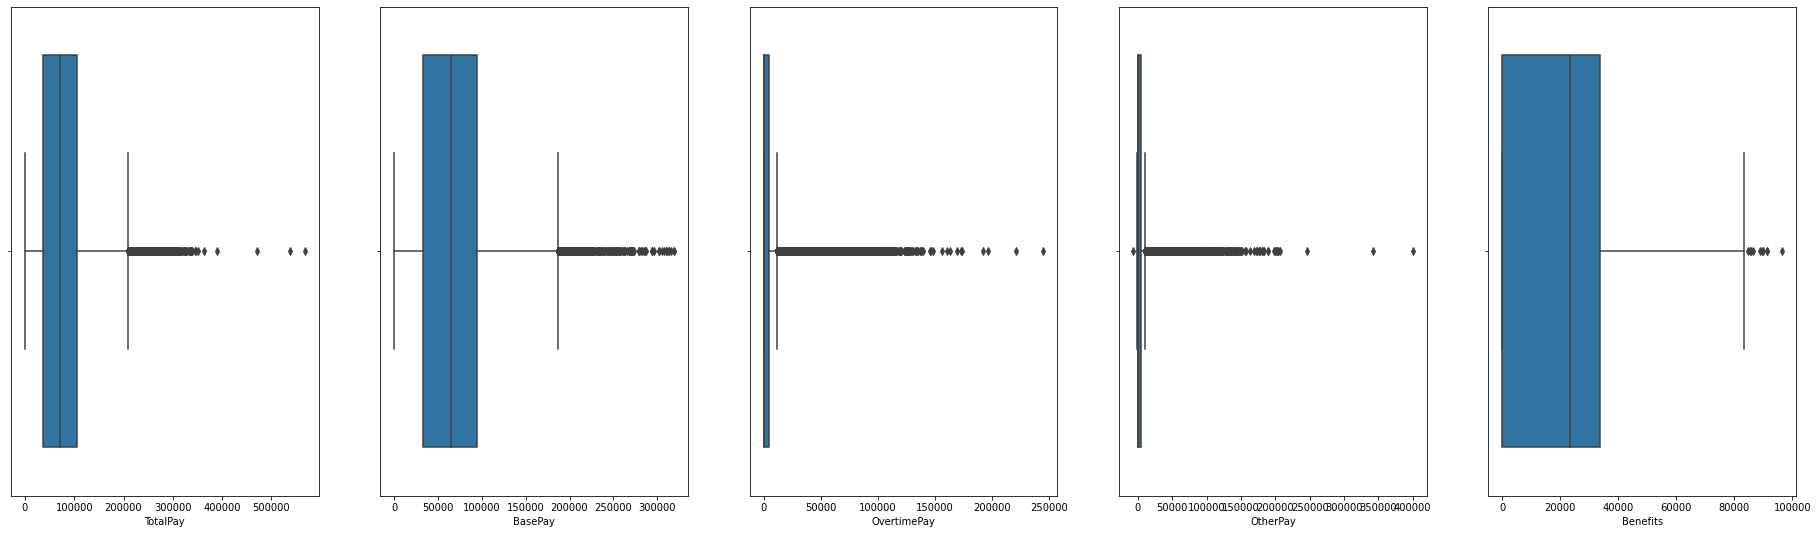

In [222]:
fig, axes = plt.subplots(1, 5, figsize=(32, 9))

sns.boxplot(sal['TotalPay'], ax=axes[0])
sns.boxplot(sal['BasePay'], ax=axes[1])
sns.boxplot(sal['OvertimePay'], ax=axes[2])
sns.boxplot(sal['OtherPay'], ax=axes[3])
sns.boxplot(sal['Benefits'], ax=axes[4])
plt.show()

In [223]:
# outliers are values greater than (Q3+1.5*IQR)
Q1 = np.percentile(sal['TotalPayBenefits'], 25, interpolation = 'midpoint')
Q3 = np.percentile(sal['TotalPayBenefits'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

In [224]:
# Upper bound
upper = np.where(sal['TotalPayBenefits'] >= (Q3+1.5*IQR))
# lower bound
lower = np.where(sal['TotalPayBenefits'] <= (Q3-1.5*IQR))

In [231]:
sal.iloc[upper]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011-01-01
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011-01-01
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011-01-01
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011-01-01
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011-01-01
...,...,...,...,...,...,...,...,...,...,...
110839,110840,Eugene G Clendinen,Manager VIII,199916.01,0.00,0.00,65837.53,199916.01,265753.54,2014-01-01
110840,110841,Elisa S Ramirez,Nurse Manager,186242.04,0.00,19651.24,59710.73,205893.28,265604.01,2014-01-01
110841,110842,Patrick G Rivera,Manager VII,199698.57,0.00,0.00,65791.21,199698.57,265489.78,2014-01-01
110842,110843,Michael C Magalong,"Lieutenant, Fire Suppression",129725.58,72629.67,16615.64,46512.31,218970.89,265483.20,2014-01-01


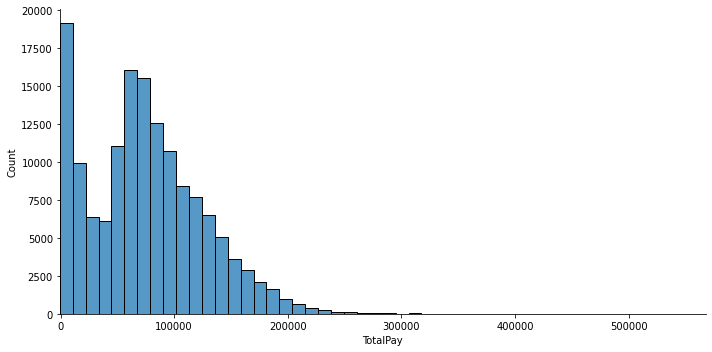

In [235]:
sns.displot(sal["TotalPay"], kde=False, bins = 50, aspect=2)
plt.margins(x=0)

In [240]:
# Count Plot показывает количество наблюдений
ax = sns.catplot(x='Year', 
            data=sal, 
            kind='count', 
            height=6, 
            aspect=2
           );  
ax.containers[0]
#plt.title('5. Count Plot - Продажи по продуктам', size=15, color='g', weight='bold');

TypeError: ignored

In [278]:
groupedvalues = sal[['Id','Year']].groupby('Year').count().reset_index()
groupedvalues.columns = ["Year", "Count"]

ax = sns.barplot(x='Year', y='Count',
                 data=groupedvalues
           );  
for index, row in groupedvalues.iterrows():
    ax.text(row.Year, row.Count, round(row.Count, 2),
            color='white', ha='center')

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [279]:
SumByYear = sal[['TotalPay','Year']].groupby('Year').sum().reset_index()
SumByYear

,Year,TotalPay
0,2011-01-01,2.594195e+09
1,2012-01-01,2.724848e+09
2,2013-01-01,2.918656e+09
3,2014-01-01,2.876911e+09


In [275]:
for index, row in groupedvalues.iterrows():
  print(row.Count)

36156
36741
37318
38071


In [242]:
sal.Year.value_counts().index

DatetimeIndex(['2014-01-01', '2013-01-01', '2012-01-01', '2011-01-01'], dtype='datetime64[ns]', freq=None)

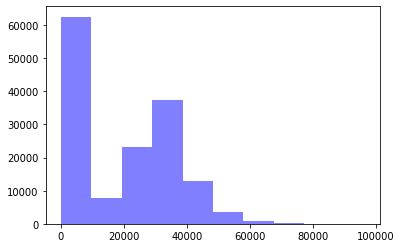

In [148]:
plt.hist(sal.Benefits,  facecolor='blue', alpha=0.5)
plt.show()

1.	Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)
2.	Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
3.	Как распределяется бюджет на разные группы (department) с течением времени?
4.	Какое количество людей в каждом департаменте? 
5.	Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
6.	На базе линейной регрессии постройте прогноз по тому, какие будут закупке в следующий год по каждому департаменту


In [53]:
sal['JobTitle'].str.lower().value_counts()

transit operator                           9424
special nurse                              5791
registered nurse                           4955
custodian                                  3214
firefighter                                3153
                                           ... 
hh mechanical shop sprv                       1
auto body&fender wrk asst sprv                1
transit power line worker supervisor ii       1
power generation technician i                 1
secretary,juvenile probation commission       1
Name: JobTitle, Length: 1637, dtype: Int64

**Conclusions**